In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)

In [2]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(protoss_data) if x not in no_standardize]

#Standardizing these columns
stand = protoss_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(protoss_data['win'])

#Displaying first and last 5 rows
display(protoss_data_standardized.head(5), protoss_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.547361,-1.444247,-1.203734,-1.13467,-0.481595,-2.104879,-1.391773,-1.122431,-0.898042,-0.452466,-0.559324,-1.352096,-0.721465,-0.833619,-0.797944,-0.405292,-0.462327,-0.396459,-1.380056,-0.190989,-0.28123,-2.206043,-0.433615,-0.213111,-0.270678,-0.335143,-0.862151,-0.139242,-0.349017,-0.493464,-0.185495,-0.157611,0.0,-1.158864,-0.624706,-0.394371,-0.339736,-0.392129,-1.444237,-1.203783,0.0,-0.532827,-1.042942,-0.614973,-0.548816,-0.651207,-0.597036,-0.131377,-0.592472,-1.116481,-0.177574,-1.215097,-0.581271,-0.545366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.395774,-1.394762,-1.167175,-1.13467,-0.481595,-1.121464,-1.002543,-1.113686,-0.898042,-0.452466,-0.559324,-1.352096,-0.721465,-0.833619,-0.797944,-0.405292,-0.462327,-0.396459,-1.380056,-0.190989,-0.28123,-2.206043,-0.433615,-0.213111,-0.270678,-0.335143,-0.862151,-0.139242,-0.349017,-0.493464,-0.185495,-0.157611,0.0,-1.158864,-0.624706,-0.394371,-0.339736,-0.392129,-1.394753,-1.056763,0.0,-0.532827,-1.042942,-0.614973,-0.548816,-0.651207,-0.597036,-0.131377,-0.592472,-1.116481,-0.177574,-1.215097,-0.581271,-0.545366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0.926069,-1.295792,-1.130616,-1.02468,-0.387351,-0.932085,-1.067414,-1.078706,-0.898042,-0.452466,-0.559324,-1.352096,-0.721465,-0.833619,-0.797944,-0.405292,-0.462327,-0.396459,-1.016908,-0.190989,-0.28123,-2.206043,-0.433615,-0.213111,-0.270678,-0.335143,-0.862151,-0.139242,-0.349017,-0.493464,-0.185495,-0.157611,0.0,-1.158864,-0.624706,-0.394371,-0.339736,-0.392129,-1.295784,-1.056763,0.0,-0.532827,-1.042942,-0.614973,-0.548816,-0.651207,-0.597036,-0.131377,-0.592472,-1.116481,-0.177574,-1.215097,-0.581271,-0.545366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.263201,-1.147337,-1.075778,-1.02468,-0.358353,-0.818458,-0.872799,-1.039354,-0.898042,-0.452466,-0.538192,-1.231943,-0.721465,-0.833619,-0.797

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
76318,0.210171,0.733096,0.642491,0.597669,0.163616,0.810197,0.230020,0.552226,0.580445,0.614989,0.307079,1.214792,1.203643,0.083595,0.087711,-0.025002,-0.462327,-0.396459,0.798833,-0.190989,2.530441,0.34003,-0.433615,-0.213111,-0.270678,-0.335143,2.235796,-0.139242,-0.349017,0.204652,-0.185495,-0.157611,0.0,0.289109,1.412572,-0.394371,-0.339736,-0.135631,0.733073,0.560448,0.0,1.876496,1.710161,0.068626,-0.548816,0.595025,-0.597036,-0.131377,1.6481,0.890566,-0.177574,0.896028,-0.581271,1.399908,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
76319,0.528348,0.733096,0.861845,0.597669,-0.394600,0.885949,0.943609,0.635303,0.816506,0.659467,0.053497,1.397751,1.845346,0.312899,0.376511,-0.025002,-0.462327,-0.396459,0.798833,-0.190989,2.530441,0.34003,-0.433615,-0.213111,-0.270678,-0.335143,2.235796,-0.139242,-0.349017,0.204652,-0.185495,-0.157611,0.0,0.289109,2.431211,-0.394371,-0.339736,-0.135631,0.733073,0.560448,0.0,1.876496,1.710161,0.068626,-0.548816,1.529699,-0.597036,-0.131377,1.6481,0.890566,-0.177574,0.896028,-0.581271,0.816325,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
76320,0.104112,0.733096,1.062919,0.597669,-0.365602,0.582943,0.878738,0.748987,0.915900,0.674293,-0.397314,1.277599,2.487049,0.496342,0.376511,-0.025002,-0.462327,0.249051,0.798833,-0.190989,2.530441,0.34003,-0.433615,-0.213111,-0.270678,-0.335143,2.235796,-0.139242,0.702560,0.204652,-0.185495,-0.157611,0.0,0.289109,2.431211,-0.394371,-0.339736,-0.135631,0.733073,0.707468,0.0,1.876496,1.710161,0.068626,-0.548816,1.529699,-0.597036,-0.131377,1.6481,0.890566,-0.177574,0.896028,-0.581271,1.205380,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
76321,-2.043581,0.683611,1.081198,0.597669,0.062122,0.620819,-1.391773,0.884534,1.251356,0.737302,0.229596,1.460558,-0.721465,0.817366,0.780831,0.014002,-0.462327,0.249051,0.798833,-0.190989,3.936276,0.34003,-0.433615,-0.213111,0.

In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y = protoss_data_standardized['win']
X_standardized = protoss_data_standardized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [5]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [6]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [7]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(48847, 1)
(12211, 1)
(15265, 1)


In [8]:
print(X_standardized_train.shape)
print(X_standardized_val.shape)
print(X_standardized_test.shape)

(48847, 123)
(12211, 123)
(15265, 123)


In [9]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_standardized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_standardized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_standardized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [10]:
val_performance = {}
performance = {}

In [11]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 14s 9ms/step - loss: 0.7105 - binary_accuracy: 0.5224 - precision: 0.5283 - recall: 0.5224 - val_loss: 0.7236 - val_binary_accuracy: 0.5122 - val_precision: 0.5052 - val_recall: 0.9584s - loss: 0.7111 - binary_accuracy: 0.5223 - precision: 0.5206 - recall - ETA: 1s - loss: 0.7110 - bi
Epoch 2/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.7001 - binary_accuracy: 0.5361 - precision: 0.5410 - recall: 0.5478 - val_loss: 0.7108 - val_binary_accuracy: 0.5310 - val_precision: 0.5161 - val_recall: 0.9225cy: 0.4839 - 
Epoch 3/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6939 - binary_accuracy: 0.5482 - precision: 0.5526 - recall: 0.5626 - val_loss: 0.7041 - val_binary_accuracy: 0.5413 - val_precision: 0.5232 - val_recall: 0.8818
Epoch 4/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6899 - binary_accuracy: 0.5562 - precision: 0.5601 - recall: 0.5719 - val_loss: 

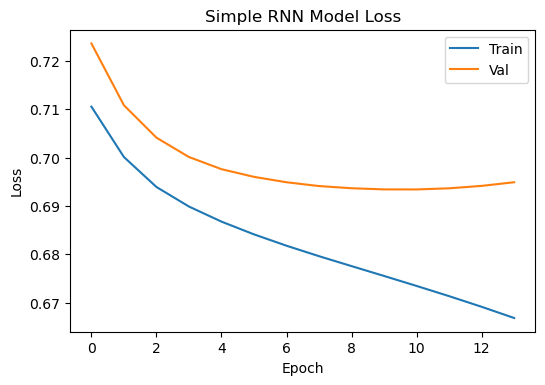

In [12]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [13]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6954 - binary_accuracy: 0.5171 - precision_1: 0.5201 - recall_1: 0.5866 - auc: 0.5170 - val_loss: 0.6900 - val_binary_accuracy: 0.5312 - val_precision_1: 0.5367 - val_recall_1: 0.4233 - val_auc: 0.5378inary_accuracy: 0.5219 - precis
Epoch 2/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6901 - binary_accuracy: 0.5242 - precision_1: 0.5402 - recall_1: 0.3990 - auc: 0.5341 - val_loss: 0.6892 - val_binary_accuracy: 0.5385 - val_precision_1: 0.5529 - val_recall_1: 0.3795 - val_auc: 0.5474cision_1: 0.5537 -  - ETA: 4s - loss: 0.6890 - binary_accuracy: 0.5261 - precision_1: 0.5 - ETA: 3s - loss: 0.6888 - binary_accuracy: 0.5309 - precision_1: 0.5400 - reca - ETA: 3s - loss: 0.6890 - binary_accuracy: 0.5320 - prec - ETA: 1s - loss: 0.6893 - binary_accuracy: 0.5321 - precision_1: 0.5371 - recall_1: 0.4371 - auc - ET

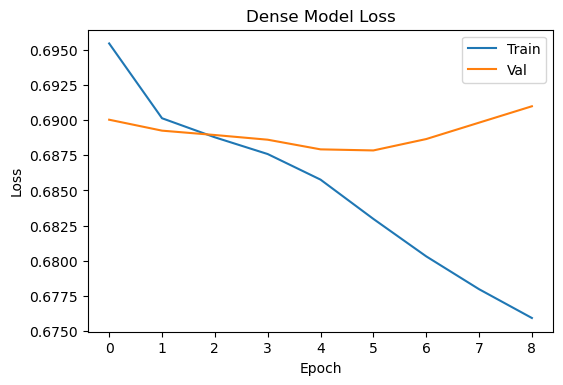

In [14]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [15]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 14s 9ms/step - loss: 0.6969 - binary_accuracy: 0.5120 - precision_2: 0.5174 - recall_2: 0.5248 - auc_1: 0.5166 - val_loss: 0.6849 - val_binary_accuracy: 0.5550 - val_precision_2: 0.5457 - val_recall_2: 0.6317 - val_auc_1: 0.5840curacy: 0.5116 - precision_2: 0.5371 - recall_2: 0.6292 - a - ETA: 5s - loss: 0.6978 - binary_accuracy: 0.5089 - precision_2: 0.5269 - recall_2: 0.6397 - auc_1 - ETA: 5s - loss: 0.6984 - binary_accuracy: 0.5070 - precision_2: 0.5237 - recall_2:  - ETA: 4s - loss: 0.6970 - binary - ETA: 2s - loss: 0.6973 - binary_accuracy: 0.5136 - precision_2: 0.5154 - recall_2: 0.5620 - auc_1: 0. - ETA: 2s - loss: 0.6972 - binary_accuracy: 0.5140 - precision_2: 0.5156 - recall_2: 0.5569 - - ETA: 2s - loss: 0.6
Epoch 2/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6871 - binary_accuracy: 0.5447 - precision_2: 0.5487 - recall_2: 0.5639 - auc_1: 0.5617 - val_loss: 0.6824 - val_binary_accuracy: 0.553

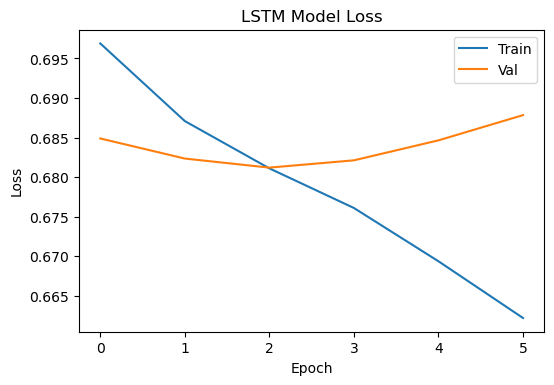

In [16]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [17]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 14s 9ms/step - loss: 0.7053 - binary_accuracy: 0.5194 - precision_3: 0.5252 - recall_3: 0.5215 - auc_2: 0.5280 - val_loss: 0.6878 - val_binary_accuracy: 0.5554 - val_precision_3: 0.5404 - val_recall_3: 0.7128 - val_auc_2: 0.5742 precision_3: 0.5248 - recall_3: 0.5214 - auc_2: 0.52
Epoch 2/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6869 - binary_accuracy: 0.5496 - precision_3: 0.5526 - recall_3: 0.5760 - auc_2: 0.5697 - val_loss: 0.6862 - val_binary_accuracy: 0.5492 - val_precision_3: 0.5419 - val_recall_3: 0.6083 - val_auc_2: 0.5763
Epoch 3/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6815 - binary_accuracy: 0.5591 - precision_3: 0.5623 - recall_3: 0.5796 - auc_2: 0.5853 - val_loss: 0.6864 - val_binary_accuracy: 0.5486 - val_precision_3: 0.5428 - val_recall_3: 0.5892 - val_auc_2: 0.578347 - binary_accuracy: 0.5482 - precision_3: 0.5567 - recall_3:  - ETA:  - ETA: 2s - loss: 

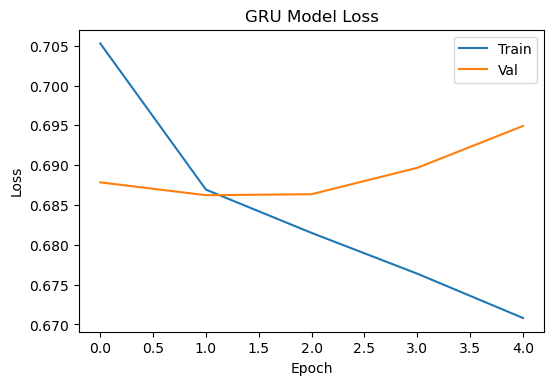

In [18]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

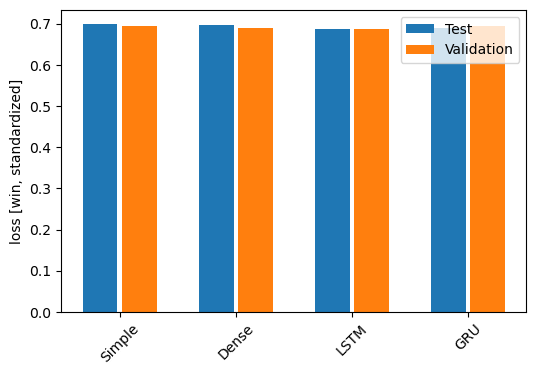

In [19]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

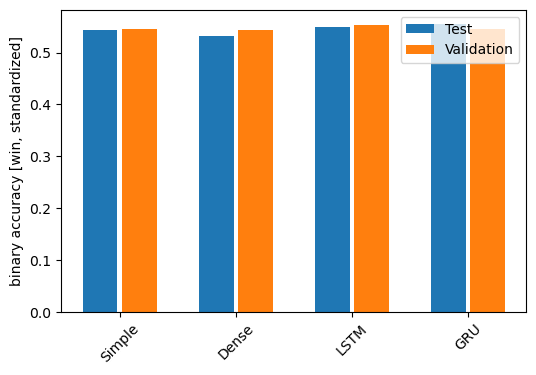

In [20]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()